<a href="https://colab.research.google.com/github/srikharshashi/learn-dl/blob/main/dropout_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/13_dropout_layer/sonar_dataset.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [ ]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [ ]:
df[60].unique()
# This is the target variable --> Binary Classification

array(['R', 'M'], dtype=object)

In [ ]:
y = df[60]
y=pd.get_dummies(y,drop_first=True)
y.sample(5)

,R
92,1
207,0
132,0
78,1
177,0


In [ ]:
df = pd.concat([df.drop(60, axis=1), y], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,R
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [ ]:
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(df))
threshold = 4
outliers = np.where(z_scores > threshold)

cleand_df = df[(z_scores < threshold).all(axis=1)]


In [ ]:
y = cleand_df['R']
x = cleand_df.drop(['R'],axis = 1)

In [ ]:
x.shape,y.shape

((191, 60), (191,))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=40)
X_pca = pca.fit_transform(x)


In [ ]:
y = y.astype(int)
y.sample(5)

67     1
52     1
169    0
139    0
173    0
Name: R, dtype: int64

In [ ]:
y.value_counts()

0    98
1    93
Name: R, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.25,random_state=1)

In [ ]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((143, 40), (48, 40), (48,), (143,))

In [ ]:
# model=keras.Sequential(
#     [
#         keras.layers.Input(shape=(60,)),
#         keras.layers.Dense(60,activation='relu'),
#         keras.layers.Dense(30,activation='relu'),
#         keras.layers.Dense(15,activation='relu'),
#         keras.layers.Dense(1,activation='sigmoid'),
#     ]
# )

# model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

# model.fit(X_train,y_train,epochs=100,batch_size=8)

In [ ]:
# model.evaluate(X_test,y_test)

In [ ]:
# y_pred=model.predict(X_test)
# y_pred

In [ ]:
# y_pred= list(map(lambda val: 0 if val<0.5  else 1,y_pred))

In [ ]:
# from sklearn.metrics import confusion_matrix,classification_report
# print(classification_report(y_test,y_pred))


So now that our model has been over fit let's see what can we do to mitigate it 

In [ ]:
model2=keras.Sequential(
    [
        keras.layers.Input(shape=(40,)),
        keras.layers.Dense(40,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(20,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1,activation='sigmoid'),
    ]
)
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
18/18 [==============================] - 11s 11ms/step - loss: 0.7144 - accuracy: 0.4965
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7395 - accuracy: 0.4685
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6963 - accuracy: 0.5734
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.7137 - accuracy: 0.5245
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6995 - accuracy: 0.5315
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6983 - accuracy: 0.4895
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.5804
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.5315
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7071 - accuracy: 0.5035
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6887 - accuracy: 0.5734
Epoch

In [ ]:
model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3294 - accuracy: 0.8958


[0.3294101655483246, 0.8958333134651184]

In [ ]:
y_pred2=model2.predict(X_test)
y_pred2

2/2 [==============================] - 0s 8ms/step


array([[4.5841981e-02],
       [9.9999964e-01],
       [9.7616520e-03],
       [2.0901244e-03],
       [9.5771039e-01],
       [1.6805288e-01],
       [9.9998391e-01],
       [3.2015461e-02],
       [1.4866055e-03],
       [6.1295975e-02],
       [1.5340919e-03],
       [9.5212424e-01],
       [9.9494225e-01],
       [2.5026808e-02],
       [4.6046716e-03],
       [9.9999642e-01],
       [3.7865776e-01],
       [9.9996209e-01],
       [8.0102289e-01],
       [9.9999630e-01],
       [9.7199935e-01],
       [3.3616598e-05],
       [2.1483378e-02],
       [7.5835323e-01],
       [9.9973553e-01],
       [8.6632466e-01],
       [7.3428726e-01],
       [3.6290932e-02],
       [2.7242079e-02],
       [9.9993968e-01],
       [9.9977905e-01],
       [7.7431463e-02],
       [3.1595945e-02],
       [5.7909399e-02],
       [9.1112506e-01],
       [9.9183625e-01],
       [3.6274925e-02],
       [9.9465442e-01],
       [9.9981636e-01],
       [7.2931143e-05],
       [9.7732395e-01],
       [9.536296

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.89      0.92      0.91        26

    accuracy                           0.90        48
   macro avg       0.90      0.89      0.89        48
weighted avg       0.90      0.90      0.90        48



In [ ]:
y_pred= list(map(lambda val: 0 if val<0.5  else 1,y_pred2))

<Axes: >

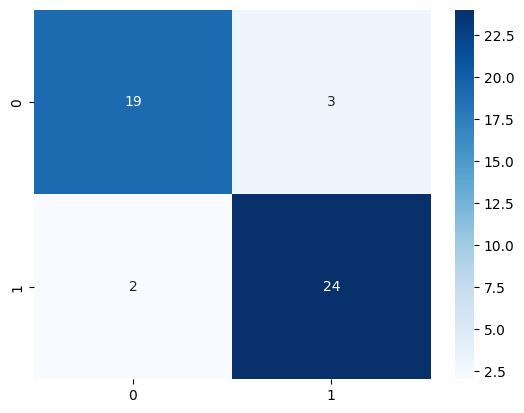

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
